In [ ]:
!pip install -q numpy==1.24.3 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, 

In [ ]:
!pip install -q nltk gensim

#1 - WORD ANALYSIS

In [ ]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt_tab')

text = "Natural Language Processing is an interesting field of AI"

tokens = word_tokenize(text)
print("Tokens: ",tokens)

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]
print("Stemmed Words: ",stemmed_words)

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
print("Lemmatized Words: ",lemmatized_words)

freq_dist = FreqDist(tokens)
print("Word Frequency: ",freq_dist.most_common())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokens:  ['Natural', 'Language', 'Processing', 'is', 'an', 'interesting', 'field', 'of', 'AI']
Stemmed Words:  ['natur', 'languag', 'process', 'is', 'an', 'interest', 'field', 'of', 'ai']
Lemmatized Words:  ['Natural', 'Language', 'Processing', 'is', 'an', 'interesting', 'field', 'of', 'AI']
Word Frequency:  [('Natural', 1), ('Language', 1), ('Processing', 1), ('is', 1), ('an', 1), ('interesting', 1), ('field', 1), ('of', 1), ('AI', 1)]


#2 WORD GENERATION

In [ ]:
import random
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
import nltk
nltk.download('punkt_tab')

def generate_text(bigrams, word, length=10):
    generated = [word]
    for _ in range(length):
        next_words = [pair[1] for pair in bigrams if pair[0] == word]

        if not next_words:
            break
        word = random.choice(next_words)
        generated.append(word)
    return ' '.join(generated)

user_input = input("Enter a block of text to use for word generation: ")

tokens = word_tokenize(user_input)

bigrams_list = list(bigrams(tokens))

print("\nBigram List:")
print(bigrams_list)

start_word = input("\nEnter the starting word: ")
word_count = int(input("Enter the number of words to generate: "))

generated_text = generate_text(bigrams_list, start_word, length=word_count)

print("\nGenerated Text:")
print(generated_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Enter a block of text to use for word generation: The brown fox jumped over the dog.

Bigram List:
[('The', 'brown'), ('brown', 'fox'), ('fox', 'jumped'), ('jumped', 'over'), ('over', 'the'), ('the', 'dog'), ('dog', '.')]

Enter the starting word: fox
Enter the number of words to generate: 4

Generated Text:
fox jumped over the dog


#3 TEXT CLASSIFICATION naive bayes


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.model_selection import train_test_split
nltk.download('punkt_tab')
nltk.download('stopwords')

data = [
    ("I love programming in Python", "positive"),
    ("Python is an amazing language", "positive"),
    ("I hate debugging errors", "negative"),
    ("Debugging is so frustrating", "negative"),
    ("I enjoy solving problems using Python", "positive"),
    ("I dislike writing documentation", "negative"),
]

stop_words = set(stopwords.words('english'))
def preprocess(sentence):
    tokens = word_tokenize(sentence.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens
def get_features(text):
    words = preprocess(text)
    return {word: True for word in words}

featuresets = [(get_features(text), label) for text, label in data]

train_set, test_set = train_test_split(featuresets, test_size=0.3, random_state=42)
classifier = NaiveBayesClassifier.train(train_set)
print("Accuracy:", accuracy(classifier, test_set))
new_sentences = [
    "I love Python",
    "I dislike errors",
]
for sentence in new_sentences:
    label = classifier.classify(get_features(sentence))
    print(f"Sentence: '{sentence}' --> Label: {label}")

Accuracy: 1.0
Sentence: 'I love Python' --> Label: positive
Sentence: 'I dislike errors' --> Label: negative


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#4 SENTIMENT ANALYSIS

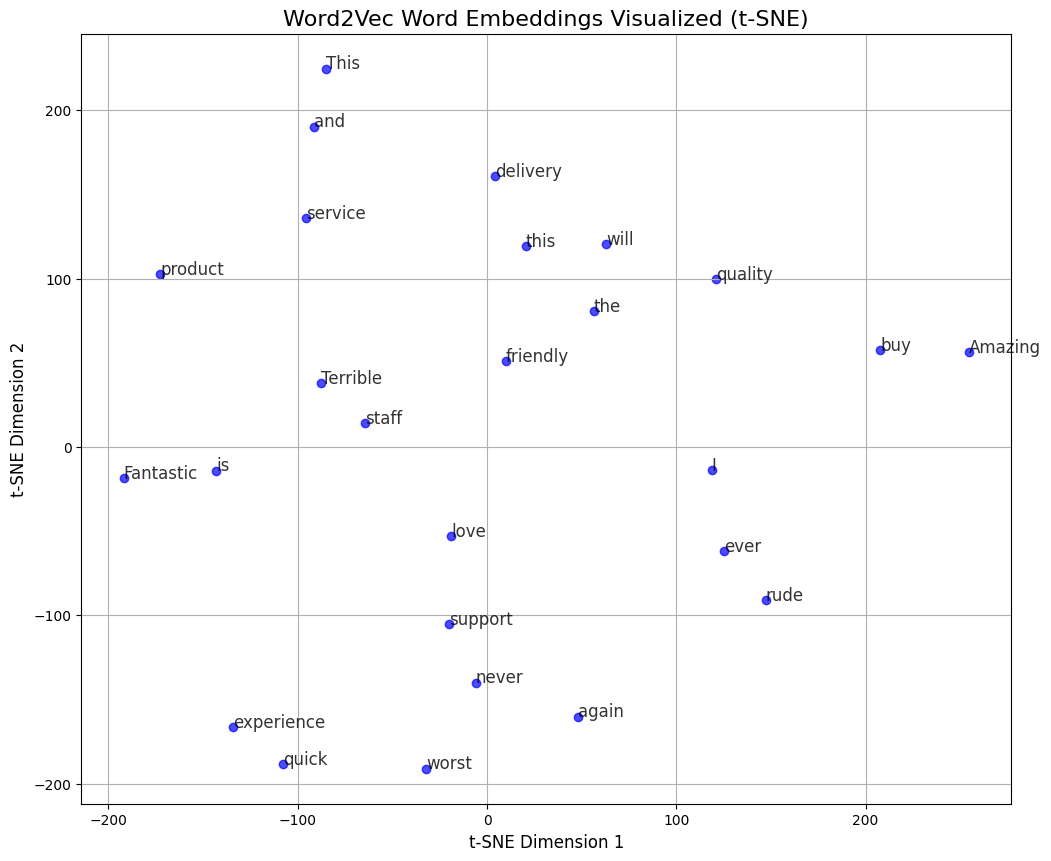

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

sentences = [["I", "love", "this", "product"],
             ["This", "is", "the", "worst", "experience", "ever"],
             ["Amazing", "service", "and", "friendly", "staff"],
             ["I", "will", "never", "buy", "this", "again"],
             ["Fantastic", "quality", "and", "quick", "delivery"],
             ["Terrible", "product", "and", "rude", "support"]]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
reduced_vectors = tsne.fit_transform(vectors)

plt.figure(figsize=(12, 10))
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y, marker='o', color='blue', alpha=0.7)
    plt.annotate(word, (x, y), fontsize=12, alpha=0.8)

plt.title("Word2Vec Word Embeddings Visualized (t-SNE)", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.grid(True)
plt.show()

##4

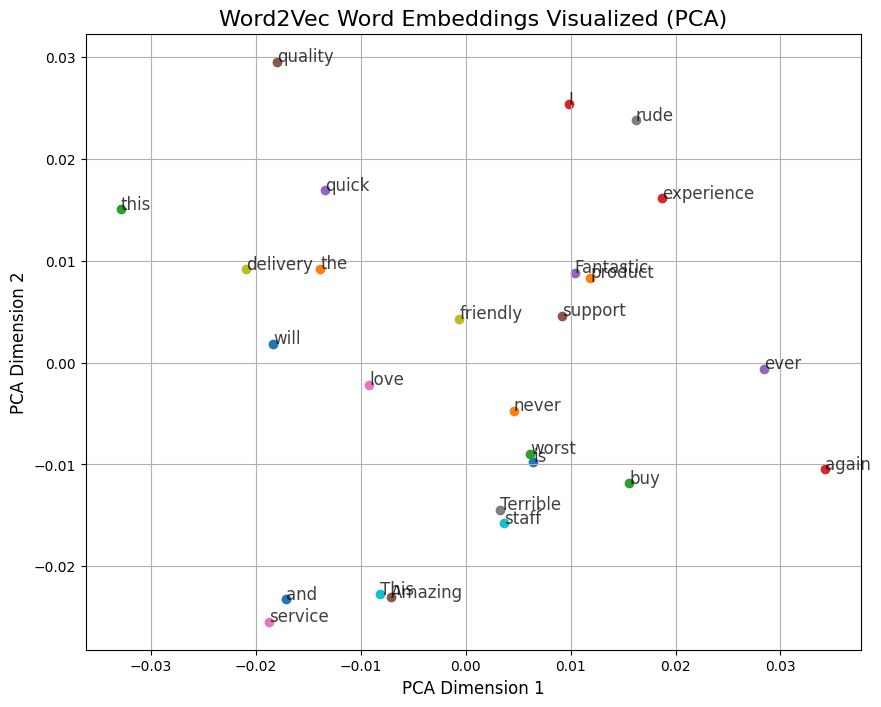

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sentences = [["I", "love", "this", "product"],
             ["This", "is", "the", "worst", "experience", "ever"],
             ["Amazing", "service", "and", "friendly", "staff"],
             ["I", "will", "never", "buy", "this", "again"],
             ["Fantastic", "quality", "and", "quick", "delivery"],
             ["Terrible", "product", "and", "rude", "support"]]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=12, alpha=0.75)

plt.title("Word2Vec Word Embeddings Visualized (PCA)", fontsize=16)
plt.xlabel("PCA Dimension 1", fontsize=12)
plt.ylabel("PCA Dimension 2", fontsize=12)
plt.grid(True)
plt.show()

##4

Accuracy: 0.42857142857142855

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.40      0.67      0.50         3

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7


Enter a sentence for sentiment analysis (or 'exit' to quit): Ram loves ice cream and thinks its fantastic

Sentiment: Positive 
Confidence: Positive = 50.80%, Negative = 49.20%


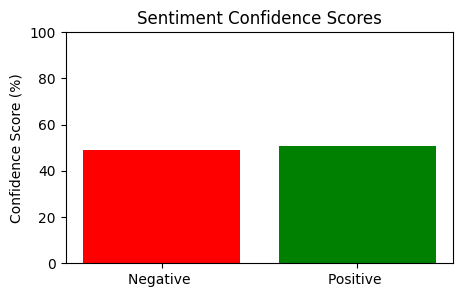


Enter a sentence for sentiment analysis (or 'exit' to quit): exit


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

texts = [
    "I love this product!", "It is a horrible experience", "Excellent service",
    "Bad quality", "Absolutely fantastic!", "Worst purchase ever", "Highly recommended",
    "Not worth the money", "Very satisfied with this", "Disappointed with the service",
    "Amazing quality!", "Would not buy again", "This is great!", "I hate this",
    "Best product I’ve used", "Terrible support", "Super happy!", "Not happy at all",
    "Friendly staff", "Awful experience", "A must-buy!", "Total waste of money"
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1, stop_words='english')
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)

model = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

def predict_and_visualize(text):
    text_vectorized = vectorizer.transform([text])
    prediction = model.predict(text_vectorized)[0]
    confidence = model.predict_proba(text_vectorized)[0]

    sentiment = "Positive " if prediction == 1 else "Negative "
    confidence_positive = confidence[1] * 100
    confidence_negative = confidence[0] * 100

    print(f"\nSentiment: {sentiment}")
    print(f"Confidence: Positive = {confidence_positive:.2f}%, Negative = {confidence_negative:.2f}%")

    # Plot Confidence Scores
    labels = ["Negative ", "Positive "]
    scores = [confidence_negative, confidence_positive]

    plt.figure(figsize=(5, 3))
    plt.bar(labels, scores, color=['red', 'green'])
    plt.ylabel("Confidence Score (%)")
    plt.title("Sentiment Confidence Scores")
    plt.ylim(0, 100)
    plt.show()

while True:
    user_input = input("\nEnter a sentence for sentiment analysis (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    predict_and_visualize(user_input)


#5 SEMANTIC ANALYSIS

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Filtered Sentences: [['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence'], ['nlp', 'techniques', 'used', 'analyze', 'understand', 'generate', 'human', 'language']]
Words similar to 'language': [('processing', 0.16072531044483185), ('subfield', 0.13722430169582367), ('natural', 0.12300863116979599), ('generate', 0.06797593832015991), ('intelligence', 0.03364057466387749)]
Similarity between 'language' and 'processing': 0.1607253


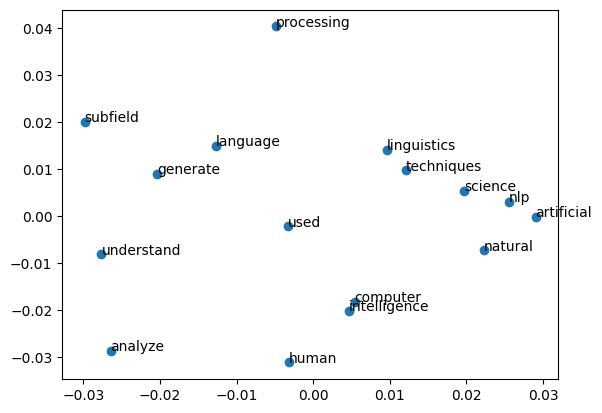

In [ ]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

nltk.download('punkt_tab')
nltk.download('stopwords')

text = """
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.
NLP techniques are used to analyze, understand, and generate human language.
"""

sentences = nltk.sent_tokenize(text)
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]

stop_words = set(stopwords.words('english'))
filtered_sentences = [
    [word for word in sentence if word not in stop_words and word not in string.punctuation]
    for sentence in tokenized_sentences
]

print("Filtered Sentences:", filtered_sentences)
model = Word2Vec(sentences=filtered_sentences, vector_size=100, window=5, min_count=1, workers=4)

model.save("word2vec.model")
vector = model.wv['language']
#print("Vector for 'language':", vector)

similar_words = model.wv.most_similar('language', topn=5)
print("Words similar to 'language':", similar_words)

similarity = model.wv.similarity('language', 'processing')
print("Similarity between 'language' and 'processing':", similarity)

words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#6 POS TAGGING

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

sentence = "The quick brown fox jumps over the lazy dog."

tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print("Parts of Speech Tags:")
for word, tag in pos_tags:
    print(f"{word} --> {tag}")

Parts of Speech Tags:
The --> DT
quick --> JJ
brown --> NN
fox --> NN
jumps --> VBZ
over --> IN
the --> DT
lazy --> JJ
dog --> NN
. --> .


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


#7 CHUNKING

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

text = "The quick brown fox jumps over the lazy dog."

words = word_tokenize(text)
pos_tags = pos_tag(words)

chunk_grammar = r"""
    NP: {<DT>?<JJ>*<NN>}
"""

chunk_parser = RegexpParser(chunk_grammar)
chunk_tree = chunk_parser.parse(pos_tags)

chunk_tree.pretty_print()
print("chunking completed")

                                S                                          
     ___________________________|_______________________________            
    |        |     |            NP               NP             NP         
    |        |     |     _______|________        |       _______|______     
jumps/VBZ over/IN ./. The/DT quick/JJ brown/NN fox/NN the/DT lazy/JJ dog/NN

chunking completed


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


#8 NER

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
nltk.download("punkt_tab")
nltk.download("maxent_ne_chunker_tab")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('words')

text = "Elon Musk founded SpaceX and Tesla Motors. He was born in South Africa."

tokens = word_tokenize(text)
tags = pos_tag(tokens)

tree = ne_chunk(tags)

def extract_named_entities(tree):
    entities = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity_name = " ".join([token for token, pos in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity_name, entity_type))
    return entities

print(f"{'Entity':<20} {'Label':<10}")
print("-" * 30)
for entity, label in extract_named_entities(tree):
    print(f"{entity:<20} {label:<10}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Entity               Label     
------------------------------
Elon                 PERSON    
Musk                 PERSON    
SpaceX               ORGANIZATION
Tesla Motors         ORGANIZATION
South Africa         GPE       
